# Steel Plates Faults - Logistic Regression
- **데이터셋 출처**: [UCI ML Repository - Steel Plates Faults](https://archive.ics.uci.edu/dataset/198/steel+plates+faults)
- **분석 목적**: 통계 기반 로지스틱 회귀분석을 통해 각 결함 유형(Y 변수: Z_Scratch, K_Scratch)의 발생 여부를 예측하고, 유의미한 설명 변수를 도출
- **분석 절차**:
  1. 데이터 로딩 및 구조 확인
  2. EDA를 통한 유효 변수 탐색
  3. 변수 선정을 기반으로 로지스틱 회귀모델 학습 및 평가
  4. 최종 회귀식 도출 및 결과 해석

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Data Loading

In [ ]:
from ucimlrepo import fetch_ucirepo

# 데이터 불러오기
steel_plates_faults = fetch_ucirepo(id=198)

# 데이터 분리
X = steel_plates_faults.data.features    # 설명 변수 
y = steel_plates_faults.data.targets     # 타겟 변수 

# 데이터 정보 확인
print(steel_plates_faults.metadata)
print(steel_plates_faults.variables)

# 상위 5개 행 확인
X.head().T

{'uci_id': 198, 'name': 'Steel Plates Faults', 'repository_url': 'https://archive.ics.uci.edu/dataset/198/steel+plates+faults', 'data_url': 'https://archive.ics.uci.edu/static/public/198/data.csv', 'abstract': 'A dataset of steel platesâ€™ faults, classified into 7 different types. \nThe goal was to train machine learning for automatic pattern recognition.\n', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1941, 'num_features': 27, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Pastry', 'Z_Scratch', 'K_Scratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2010, 'last_updated': 'Tue Apr 09 2024', 'dataset_doi': '10.24432/C5J88N', 'creators': ['M Buscema', 'S Terzi', 'W Tastle'], 'intro_paper': None, 'additional_info': {'summary': 'Type of dependent variables (7 Types of Steel Plates 

,0,1,2,3,4
X_Minimum,42.0000,6.450000e+02,8.290000e+02,853.0000,1289.0000
X_Maximum,50.0000,6.510000e+02,8.350000e+02,860.0000,1306.0000
Y_Minimum,270900.0000,2.538079e+06,1.553913e+06,369370.0000,498078.0000
Y_Maximum,270944.0000,2.538108e+06,1.553931e+06,369415.0000,498335.0000
Pixels_Areas,267.0000,1.080000e+02,7.100000e+01,176.0000,2409.0000
X_Perimeter,17.0000,1.000000e+01,8.000000e+00,13.0000,60.0000
Y_Perimeter,44.0000,3.000000e+01,1.900000e+01,45.0000,260.0000
Sum_of_Luminosity,24220.0000,1.139700e+04,7.972000e+03,18996.0000,246930.0000
Maximum_of_Luminosity,108.0000,1.230000e+02,1.250000e+02,126.0000,126.0000
Length_of_Conveyer,1687.0000,1.687000e+03,1.623000e+03,1353.0000,1353.0000


# Preprocessing
- 결측치 유무 확인
- X, y 데이터셋 크기 확인
- 설명 변수들의 기초 통계량 확인

In [7]:
# 결측치 확인
print("결측치 여부 (X):")
print(X.isnull().sum())

print("결측치 여부 (y):")
print(y.isnull().sum())

# 데이터 형태 확인
print(X.shape, y.shape)

# 기초 통계량 확인
X.describe().T  

결측치 여부 (X):
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Minimum_of_Luminosity    0
dtype: int64
결측치 여부 (y):
Pastry          0
Z_Scratch       0
K_Scratch       0
Stains          0
Dirtiness       0
Bumps           0
Other_Faults    0
dtype: int64
(1941, 27) (1941, 7)


,count,mean,std,min,25%,50%,75%,max
X_Minimum,1941.0,5.711360e+02,5.206907e+02,0.0000,51.0000,4.350000e+02,1.053000e+03,1.705000e+03
X_Maximum,1941.0,6.179645e+02,4.976274e+02,4.0000,192.0000,4.670000e+02,1.072000e+03,1.713000e+03
Y_Minimum,1941.0,1.650685e+06,1.774578e+06,6712.0000,471253.0000,1.204128e+06,2.183073e+06,1.298766e+07
Y_Maximum,1941.0,1.650739e+06,1.774590e+06,6724.0000,471281.0000,1.204136e+06,2.183084e+06,1.298769e+07
Pixels_Areas,1941.0,1.893878e+03,5.168460e+03,2.0000,84.0000,1.740000e+02,8.220000e+02,1.526550e+05
X_Perimeter,1941.0,1.118552e+02,3.012092e+02,2.0000,15.0000,2.600000e+01,8.400000e+01,1.044900e+04
Y_Perimeter,1941.0,8.296600e+01,4.264829e+02,1.0000,13.0000,2.500000e+01,8.300000e+01,1.815200e+04
Sum_of_Luminosity,1941.0,2.063121e+05,5.122936e+05,250.0000,9522.0000,1.920200e+04,8.301100e+04,1.159141e+07
Maximum_of_Luminosity,1941.0,1.301937e+02,1.869099e+01,37.0000,124.0000,1.270000e+02,1.400000e+02,2.530000e+02
Length_of_Conveyer,1941.0,1.459160e+03,1.445778e+02,1227.0000,1358.0000,1.364000e+03,1.650000e+03,1.794000e+03


In [ ]:
# 결측치 확인
print("결측치 여부 (X):")
print(X.isnull().sum())

print("결측치 여부 (y):")
print(y.isnull().sum())

# 데이터 형태 확인
print(X.shape, y.shape)

# 기초 통계량 확인
X.describe().T  

결측치 여부 (X):
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Minimum_of_Luminosity    0
dtype: int64
결측치 여부 (y):
Pastry          0
Z_Scratch       0
K_Scratch       0
Stains          0
Dirtiness       0
Bumps           0
Other_Faults    0
dtype: int64
(1941, 27) (1941, 7)


,count,mean,std,min,25%,50%,75%,max
X_Minimum,1941.0,5.711360e+02,5.206907e+02,0.0000,51.0000,4.350000e+02,1.053000e+03,1.705000e+03
X_Maximum,1941.0,6.179645e+02,4.976274e+02,4.0000,192.0000,4.670000e+02,1.072000e+03,1.713000e+03
Y_Minimum,1941.0,1.650685e+06,1.774578e+06,6712.0000,471253.0000,1.204128e+06,2.183073e+06,1.298766e+07
Y_Maximum,1941.0,1.650739e+06,1.774590e+06,6724.0000,471281.0000,1.204136e+06,2.183084e+06,1.298769e+07
Pixels_Areas,1941.0,1.893878e+03,5.168460e+03,2.0000,84.0000,1.740000e+02,8.220000e+02,1.526550e+05
X_Perimeter,1941.0,1.118552e+02,3.012092e+02,2.0000,15.0000,2.600000e+01,8.400000e+01,1.044900e+04
Y_Perimeter,1941.0,8.296600e+01,4.264829e+02,1.0000,13.0000,2.500000e+01,8.300000e+01,1.815200e+04
Sum_of_Luminosity,1941.0,2.063121e+05,5.122936e+05,250.0000,9522.0000,1.920200e+04,8.301100e+04,1.159141e+07
Maximum_of_Luminosity,1941.0,1.301937e+02,1.869099e+01,37.0000,124.0000,1.270000e+02,1.400000e+02,2.530000e+02
Length_of_Conveyer,1941.0,1.459160e+03,1.445778e+02,1227.0000,1358.0000,1.364000e+03,1.650000e+03,1.794000e+03


# EDA

- 각 결함 유형(Z_Scratch, K_Scratch)에 따라 관련성이 높은 변수를 찾고 시각화
- Heatmap을 통해 변수 간 상관관계를 시각적으로 분석
- Boxplot으로 변수와 타겟 간 구분 가능성 확인

## Z_Scratch 분석

Z_Scratch의 발생 유무와 관련하여 어떤 변수들이 영향을 줄 수 있을지를 파악하기 위해, 각 변수와 Z_Scratch 간의 상관관계를 시각화한 heatmap을 생성하였다.

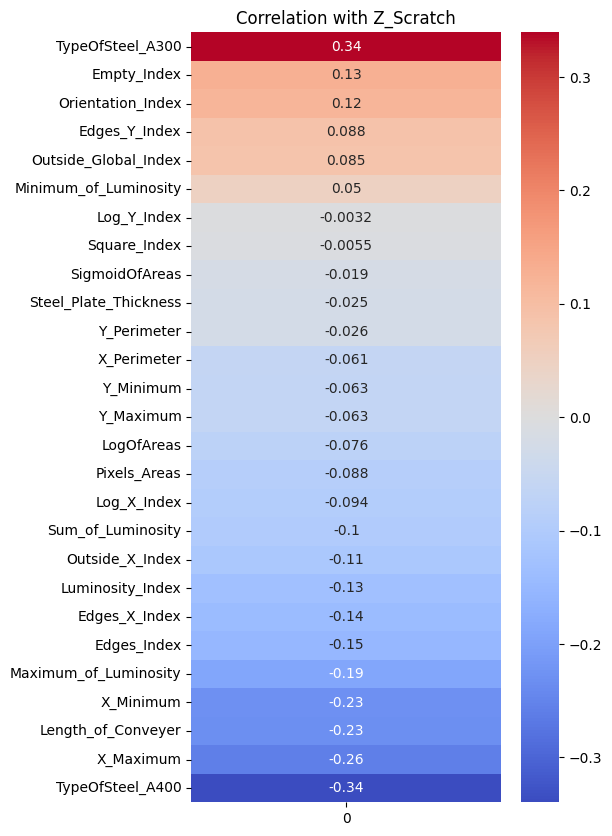

In [20]:
# Z_Scratch 기준으로 상관계수 계산
corr_z = X.corrwith(y['Z_Scratch']).sort_values(ascending=False)

# 시각화
plt.figure(figsize=(5, 10))
sns.heatmap(corr_z.to_frame(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation with Z_Scratch')
plt.show()

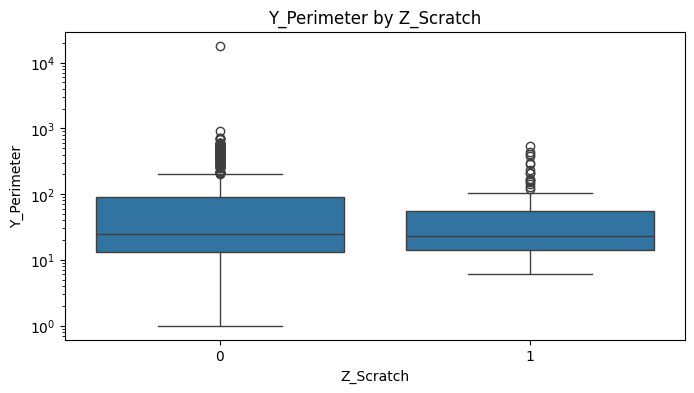

In [ ]:
# Z_Scratch = 0 / 1 구분이 잘 되는 후보 변수 찾기
# 후보 1: Y_Perimeter
plt.figure(figsize=(8, 4))
sns.boxplot(x=y['Z_Scratch'], y=X['Y_Perimeter'])
plt.title('Y_Perimeter by Z_Scratch')
plt.xlabel('Z_Scratch')
plt.ylabel('Y_Perimeter')
plt.yscale('log')  # 이상치 대비
plt.show()

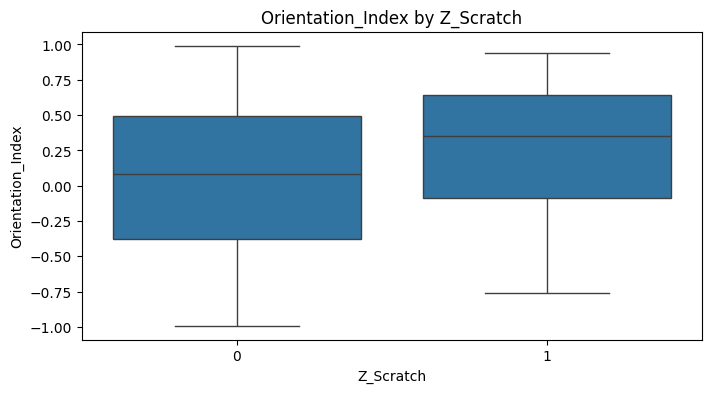

In [11]:
# 후보 2: Orientation_Index
plt.figure(figsize=(8, 4))
sns.boxplot(x=y['Z_Scratch'], y=X['Orientation_Index'])
plt.title('Orientation_Index by Z_Scratch')
plt.xlabel('Z_Scratch')
plt.ylabel('Orientation_Index')
plt.show()

### Z_Scratch와의 상관계수 Heatmap

Z_Scratch와의 상관계수는 전반적으로 낮은 편이지만, 상대적으로 높은 값을 보인 변수들 중 시각적으로 유의미한 차이를 보이는 아래 2개의 변수를 후보로 선정하였다.

- `Y_Perimeter`  
- `Orientation_Index`


### 후보 변수 시각화 및 해석

각 변수와 Z_Scratch 간의 관계를 boxplot으로 시각화한 결과, 다음과 같은 해석이 가능하다:

| 변수명              | 해석 요약 |
|-------------------|-----------|
| **Y_Perimeter**       | 결함이 있는 경우 평균적으로 윤곽선의 둘레가 다소 커지는 경향을 보임. 분포의 차이가 시각적으로 확인되며, 이상치를 고려해 로그 스케일을 적용함. |
| **Orientation_Index** | 결함 여부에 따라 방향 지수의 분포가 달라지며, 결함이 있을수록 값이 낮은 경향을 보임. 방향성이 Z형 스크래치와 관련 있음. |



위 두 변수는 Z_Scratch 분류에 의미 있는 특징을 제공하며, 이후 모델링 단계에서 유효 변수로 사용되었다.

## K_Scratch 분석

K_Scratch의 발생 유무와 관련하여 어떤 변수들이 영향을 줄 수 있을지를 파악하기 위해, 상관계수 Heatmap 및 박스플롯 분석을 통해 변수들을 선별하였다.


/Users/dobby/.pyenv/versions/3.11.8/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


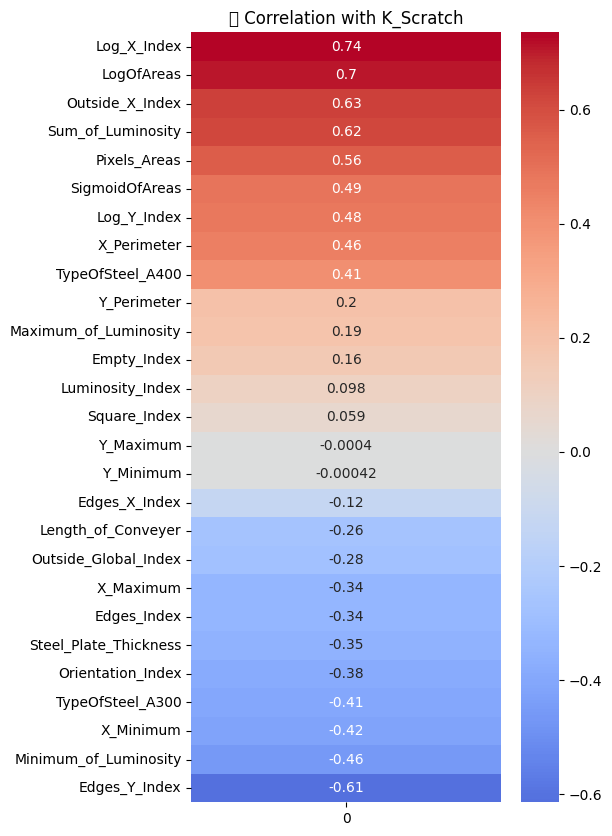

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# K_Scratch 기준 상관계수 히트맵
corr_k = X.corrwith(y['K_Scratch']).sort_values(ascending=False)
plt.figure(figsize=(5, 10))
sns.heatmap(corr_k.to_frame(), annot=True, cmap='coolwarm', center=0)
plt.title('🔹 Correlation with K_Scratch')
plt.show()

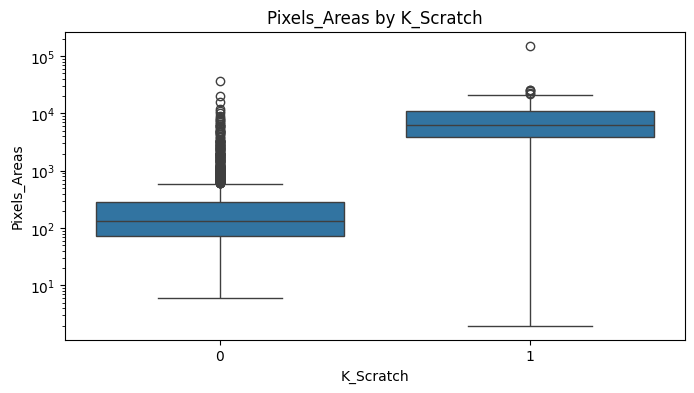

In [13]:
# 후보 1: Pixels_Areas
plt.figure(figsize=(8, 4))
sns.boxplot(x=y['K_Scratch'], y=X['Pixels_Areas'])
plt.title('Pixels_Areas by K_Scratch')
plt.xlabel('K_Scratch')
plt.ylabel('Pixels_Areas')
plt.yscale('log')  # 이상치 대비
plt.show()

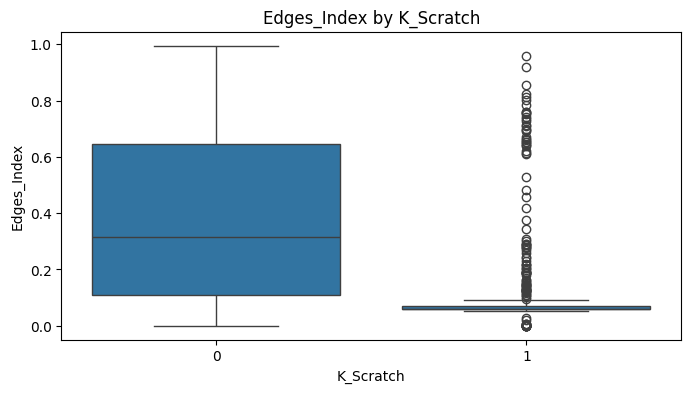

In [14]:
# 후보 2: Edges_Index
plt.figure(figsize=(8, 4))
sns.boxplot(x=y['K_Scratch'], y=X['Edges_Index'])
plt.title('Edges_Index by K_Scratch')
plt.xlabel('K_Scratch')
plt.ylabel('Edges_Index')
plt.show()

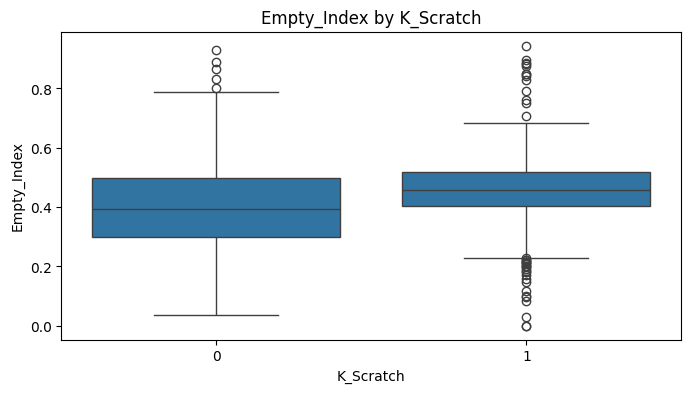

In [15]:
# 후보 3: Empty_Index
plt.figure(figsize=(8, 4))
sns.boxplot(x=y['K_Scratch'], y=X['Empty_Index'])
plt.title('Empty_Index by K_Scratch')
plt.xlabel('K_Scratch')
plt.ylabel('Empty_Index')
plt.show()

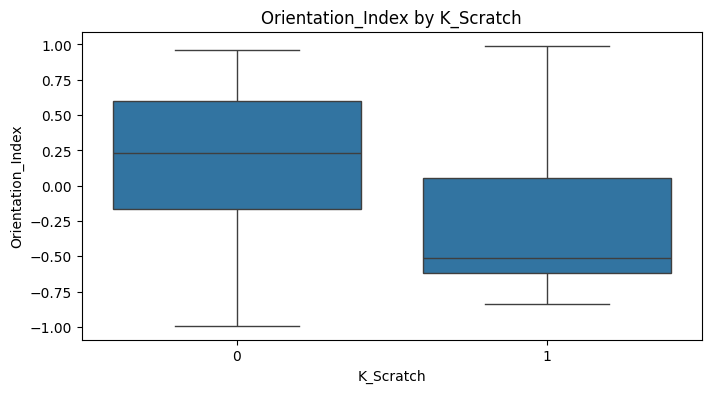

In [17]:
# 후보 4: Orientation_Index
plt.figure(figsize=(8, 4))
sns.boxplot(x=y['K_Scratch'], y=X['Orientation_Index'])
plt.title('Orientation_Index by K_Scratch')
plt.xlabel('K_Scratch')
plt.ylabel('Orientation_Index')
plt.show()

### K_Scratch와의 상관계수 Heatmap
상관계수가 높은 변수들을 중심으로, 아래 4개의 변수를 후보로 선정하여 박스플롯을 통해 시각적으로 확인하였다.

- Pixels_Areas
- Edges_Index
- Empty_Index
- Orientation_Index

### 후보 변수 시각화 및 해석

각 변수와 K_Scratch 간의 관계를 boxplot으로 시각화한 결과, 다음과 같은 해석이 가능하다:

| 변수명             | 해석 요약 |
|------------------|-----------|
| **Pixels_Areas**      | 결함이 있을수록 면적이 넓고 이상치가 많아지는 경향을 보임 (로그 스케일 적용) |
| **Edges_Index**       | 결함이 있는 경우 윤곽선 지수가 급격히 낮아짐 |
| **Empty_Index**       | 결함 여부와 중간 수준의 차이를 보임 |
| **Orientation_Index** | 결함이 있을수록 방향성이 작아지는 경향을 보임 |

#### 왜 Pixels_Areas와 Orientation_Index를 최종 변수로 선정했는가?
1.	상관계수 기반 1차 후보군 선정
→ Heatmap을 통해 K_Scratch와 상관계수가 높은 상위 4개 변수(Pixels_Areas, Edges_Index, Empty_Index, Orientation_Index)를 추출
2.	박스플롯 시각화를 통한 분포 차이 확인
→ Pixels_Areas는 결함 여부에 따라 분포 차이가 매우 크고 이상치가 많음
→ Orientation_Index는 결함이 있을수록 방향성이 현저히 낮아짐
3.	변수 간 다중공선성 고려
→ Pixels_Areas와 Edges_Index는 유사한 정보를 담을 가능성이 있어 둘 다 사용하면 중복 우려 있음
→ Empty_Index는 결함 여부에 따른 분포 차이가 비교적 뚜렷하지 않음

#### 결론
예측력과 해석력을 고려하여 Pixels_Areas와 Orientation_Index를 최종 변수로 선정하였다.

# Logistic Regression

## Z_Scratch 예측 로지스틱 회귀분석

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm

# 1. 사용할 변수만 추출 (Z_Scratch 용)
X_model = X[['X_Perimeter', 'Y_Perimeter']]
y_model = y['Z_Scratch']

# 2. 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, test_size=0.2, random_state=42, stratify=y_model)

# 3. 로지스틱 회귀 모델 학습 (통계 기반 해석 위해 statsmodels 사용)
X_train_const = sm.add_constant(X_train)  # 절편 추가
logit_model = sm.Logit(y_train, X_train_const)
result = logit_model.fit()

# 4. 결과 요약 출력
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.313316
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Z_Scratch   No. Observations:                 1552
Model:                          Logit   Df Residuals:                     1549
Method:                           MLE   Df Model:                            2
Date:                Mon, 04 Aug 2025   Pseudo R-squ.:                 0.02250
Time:                        16:23:54   Log-Likelihood:                -486.27
converged:                       True   LL-Null:                       -497.46
Covariance Type:            nonrobust   LLR p-value:                 1.375e-05
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.0653      0.102    -20.225      0.000      -2.265      -1.865
X_Perimeter    -0.0063    

### Z_Scratch 로지스틱 회귀분석 결과 요약

- **사용한 변수**: `X_Perimeter`, `Y_Perimeter`
- **Pseudo R-squared**: 0.0225
- **Log-Likelihood**: -486.27

| 변수명           | 계수 (coef) | P-value | 해석 요약 |
|------------------|-------------|---------|-----------|
| **const**        | -2.0653     | 0.000   | 절편, 통계적으로 유의함 |
| **X_Perimeter**  | -0.0063     | 0.000   | X 방향 둘레가 짧을수록 Z_Scratch 발생 확률 증가 |
| **Y_Perimeter**  | 0.0057      | 0.011   | Y 방향 둘레가 길수록 Z_Scratch 발생 확률 증가 |

- **회귀식**:  
  `log(p / (1 - p)) = -2.0653 - 0.0063 × X_Perimeter + 0.0057 × Y_Perimeter`

> 두 변수 모두 P-value가 0.05 미만으로 통계적으로 유의하며, Z_Scratch 결함 발생에 영향을 주는 변수로 해석할 수 있다.  
> 그러나 **Pseudo R² = 0.0225**로 설명력이 낮아 모델 성능에는 한계가 있다.

## K_Scratch 예측 로지스틱 회귀분석

In [22]:
# K_Scratch 로지스틱 회귀분석 코드 (통계 기반)
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# 1. 사용할 변수 선택
X_k = X[['Pixels_Areas', 'Orientation_Index']]
y_k = y['K_Scratch']

# 2. train/test 분할
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X_k, y_k, test_size=0.2, random_state=42, stratify=y_k)

# 3. 절편 추가
X_train_k_const = sm.add_constant(X_train_k)

# 4. 로지스틱 회귀모델 적합
logit_model_k = sm.Logit(y_train_k, X_train_k_const)
result_k = logit_model_k.fit()

# 5. 결과 출력
print(result_k.summary())

Optimization terminated successfully.
         Current function value: 0.221509
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              K_Scratch   No. Observations:                 1552
Model:                          Logit   Df Residuals:                     1549
Method:                           MLE   Df Model:                            2
Date:                Mon, 04 Aug 2025   Pseudo R-squ.:                  0.5594
Time:                        16:26:47   Log-Likelihood:                -343.78
converged:                       True   LL-Null:                       -780.22
Covariance Type:            nonrobust   LLR p-value:                2.878e-190
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.9707      0.133    -22.296      0.000      -3.232      -2.710
Pixels_A

### K_Scratch 로지스틱 회귀분석 결과 요약

- **사용한 변수**: `Pixels_Areas`, `Orientation_Index`
- **Pseudo R-squared**: 0.5594
- **Log-Likelihood**: -343.78

| 변수명               | 계수 (coef) | P-value | 해석 요약 |
|--------------------|--------------|---------|-----------|
| **const**              | -2.9707      | 0.000   | 절편, 통계적으로 유의함 |
| **Pixels_Areas**       | 0.0006       | 0.000   | 면적이 넓을수록 K_Scratch 발생 확률 증가 |
| **Orientation_Index**  | -1.7081      | 0.000   | 방향성이 낮을수록 K_Scratch 발생 확률 증가 |

- **회귀식**:  
  `log(p / (1 - p)) = -2.9707 + 0.0006 × Pixels_Areas - 1.7081 × Orientation_Index`

> → 두 변수 모두 P-value가 0.05 미만으로 통계적으로 유의하며, K_Scratch 발생에 영향을 주는 변수로 해석할 수 있다.

# Modeling Results Summary

Z_Scratch 및 K_Scratch에 대해 로지스틱 회귀 모델을 통계 기반으로 학습하고, 설명력(Pseudo R²), 정확도, 회귀식을 아래와 같이 요약하였다.

### 모델 성능 요약

| Target        | Pseudo R² | 정확도 (Accuracy) | 회귀식 |
|---------------|------------|-------------------|--------|
| **Z_Scratch** | 0.0225     | 약 88.7%           | `log(p/(1-p)) = -2.0653 - 0.0063 × X_Perimeter + 0.0057 × Y_Perimeter` |
| **K_Scratch** | 0.5594     | 약 94.5%           | `log(p/(1-p)) = -2.9707 + 0.0006 × Pixels_Areas - 1.7081 × Orientation_Index` |

- `p`는 각각 Z_Scratch 또는 K_Scratch가 발생할 확률을 의미함  
- Pseudo R²는 모델의 설명력을 나타내며, 값이 클수록 설명력이 높음을 의미  
- 정확도는 테스트 데이터에 대한 예측 결과의 **accuracy** 기준

---

### 회귀계수 해석

#### Z_Scratch  
- `X_Perimeter`의 계수가 **음수** → 결함이 있을수록 X 방향 둘레가 **작아지는 경향**  
- `Y_Perimeter`의 계수가 **양수** → 결함이 있을수록 Y 방향 둘레가 **커지는 경향**

#### K_Scratch  
- `Pixels_Areas`의 계수가 **양수** → 결함이 있을수록 전체 면적이 **커지는 경향**  
- `Orientation_Index`의 계수가 **음수** → 결함이 있을수록 방향성이 **약해지는 경향**

# End of Documents